In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import olx
import cPickle as pickle

# Download and save data (optional)

In [3]:
tc = olx.olxChecker('motoryzacja/samochody/ford/mondeo')

In [4]:
ofrs = tc.updateDatabase()

INFO:OLX:Found 92 pages
INFO:OLX:There are 39 offers (28 are not from olx) on page 1
INFO:OLX:There are 39 offers (29 are not from olx) on page 2
INFO:OLX:There are 39 offers (32 are not from olx) on page 3
INFO:OLX:There are 39 offers (25 are not from olx) on page 4
INFO:OLX:There are 39 offers (21 are not from olx) on page 5
INFO:OLX:There are 39 offers (23 are not from olx) on page 6
INFO:OLX:There are 39 offers (20 are not from olx) on page 7
INFO:OLX:There are 39 offers (27 are not from olx) on page 8
INFO:OLX:There are 39 offers (27 are not from olx) on page 9
INFO:OLX:There are 39 offers (28 are not from olx) on page 10
INFO:OLX:There are 39 offers (24 are not from olx) on page 11
INFO:OLX:There are 39 offers (29 are not from olx) on page 12
INFO:OLX:There are 39 offers (23 are not from olx) on page 13
INFO:OLX:There are 39 offers (17 are not from olx) on page 14
INFO:OLX:There are 39 offers (24 are not from olx) on page 15
INFO:OLX:There are 39 offers (22 are not from olx) on p

NameError: global name 'connectOffers' is not defined

In [5]:
tc.save('mondeo.db')

# Load data

In [3]:
tc = olx.olxChecker(database='mondeo.db')

In [5]:
offrs_dtls = tc.offers.values()

# Analysis

In [6]:
def by_year_stats(filters=None,names=None,min_count=0):
    price_by_year = {}
    if filters is None:
        filters = [lambda x: True]
        names = ['All']
    assert len(filters) == len(names)
    for offer in offrs_dtls:
        if 'Rok produkcji' in offer['details']:
            rp = offer['details']['Rok produkcji']
            if rp not in price_by_year:
                price_by_year[rp] = [[] for _ in xrange(len(filters))]
            for i, fltr in enumerate(filters):
                if fltr(offer):        
                    price_by_year[rp][i] += [offer['price']]
    years = []
    counts = [[] for _ in xrange(len(filters))]
    means = [[] for _ in xrange(len(filters))]
    stdevs = [[] for _ in xrange(len(filters))]
    for year in sorted(price_by_year.keys()):
        years += [int(year)]
        for i in xrange(len(filters)):
            counts[i] += [len(price_by_year[year][i])]
            if counts[i][-1] == 0:
                means[i] += [0]
                stdevs[i] += [0]
            else:
                means[i] += [numpy.mean(price_by_year[year][i])]
                stdevs[i] += [numpy.std(price_by_year[year][i])]
    years = np.array(years)
    counts = np.array(counts)
    means = np.array(means)
    stdevs = np.array(stdevs)
    mask = (counts >= min_count).all(axis=0) 

    figsize(7,12)
    subplot(211)
    title('Count of offers by year')
    for i,name in enumerate(names):
        plot(years[mask], counts[i][mask], label=name)
    if len(names) > 1:
        legend()
    subplot(212)
    title('Mean of offers by year')
    for i,name in enumerate(names):
        plot(years[mask], means[i][mask], label=name)
        if len(names) == 1:
            errorbar(years[mask], means[i][mask], yerr=stdevs[i][mask], alpha=0.3)
    if len(names) > 1:
        legend()
    
    head = ['Rok']
    for i,name in enumerate(names):
        head += ['Ilość', name]
    print " | ".join(head)
    for j,y in enumerate(years):
        row = [str(y)]
        for i,_ in enumerate(names):
            row += [str(counts[i][j]),str(means[i][j])]
        print " ".join(row)
    figsize(7,7)
    
    return price_by_year
    
def find_by_type(path):
    types = {}
    for ofr in offrs_dtls:
        ctype = ofr
        for p in path:
            try:
                ctype = ctype[p]
            except:
                ctype = 'N/A'
                break
        types[ctype] = types.get(ctype, 0) + 1
    items = types.items()
    for i in argsort(types.values()):
        print u"{}: {}".format(items[i][0], items[i][1])
    

Rok | Ilość | All
1992 1 1500.0
1993 11 2492.63636364
1994 16 1759.3125
1995 18 1516.61111111
1996 23 2291.73913043
1997 54 1917.85185185
1998 65 2082.98461538
1999 40 2218.2
2000 48 3079.04166667
2001 204 5146.7745098
2002 200 5306.71
2003 135 5966.99259259
2004 132 6940.79545455
2005 59 8049.08474576
2006 60 9082.98333333
2007 55 19037.0545455
2008 62 21741.0483871
2009 31 26725.8064516
2010 22 26809.0909091
2011 16 31818.4375
2012 6 24633.3333333
2013 8 41324.875
2014 9 57532.2222222
2015 5 56940.0
2016 1 65000.0


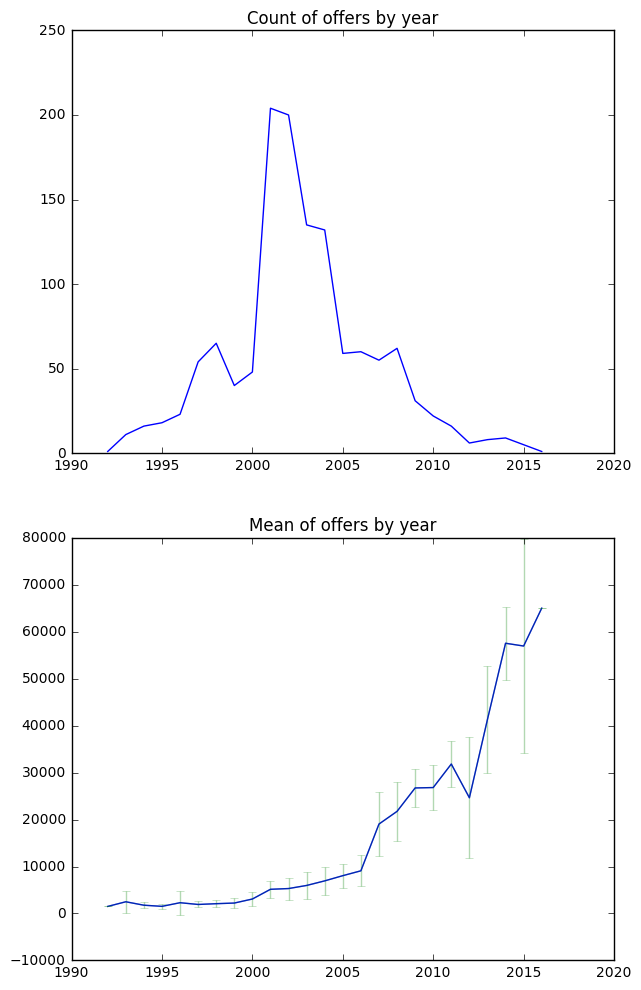

In [7]:
price_by_year = by_year_stats(min_count=1)

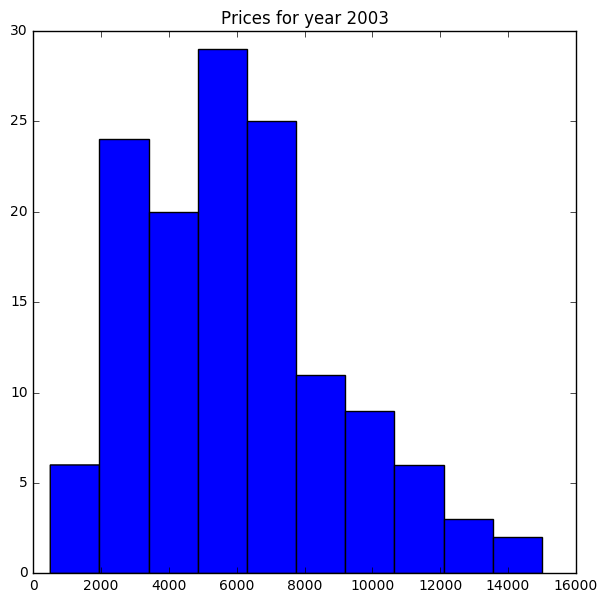

In [8]:
title('Prices for year 2003')
_ = hist(price_by_year['2003'][0])

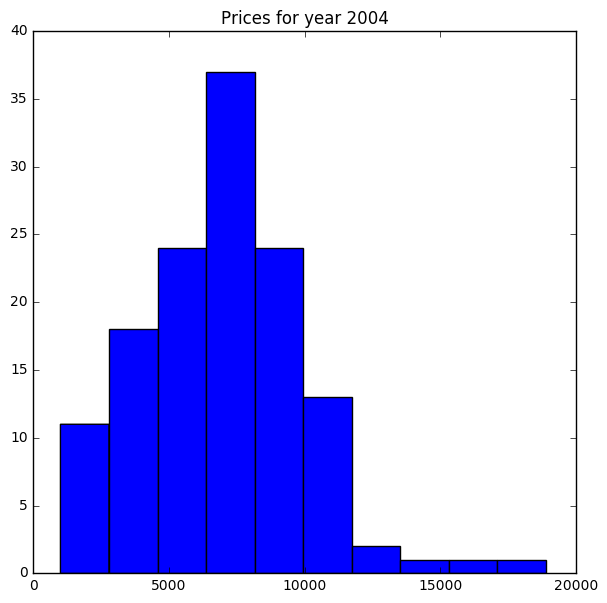

In [9]:
title('Prices for year 2004')
_ = hist(price_by_year['2004'][0])

Rok | Ilość | Diesel | Ilość | Benzyna | Ilość | LPG
1992 0 0.0 0 0.0 1 1500.0
1993 0 0.0 8 1846.125 3 4216.66666667
1994 3 1400.0 9 1761.11111111 4 2024.75
1995 4 1100.0 11 1545.36363636 3 1966.66666667
1996 5 1840.0 10 2881.0 8 1837.5
1997 16 2027.5 23 1617.34782609 15 2261.66666667
1998 27 2051.66666667 18 1963.88888889 20 2232.45
1999 18 1927.16666667 14 2782.07142857 8 1886.25
2000 27 2714.62962963 9 3966.66666667 12 3233.25
2001 127 4427.74015748 54 6284.81481481 23 6445.17391304
2002 136 4642.98529412 43 6674.34883721 21 6804.71428571
2003 108 5168.93518519 18 9483.27777778 9 8511.11111111
2004 112 6561.91964286 13 9373.07692308 7 8485.71428571
2005 52 7788.38461538 5 8720.0 2 13150.0
2006 54 8901.5 5 10959.6 1 9500.0
2007 52 18862.2884615 2 19649.5 1 26900.0
2008 57 21957.1052632 4 17222.5 1 27500.0
2009 23 25873.9130435 6 29316.6666667 2 28750.0
2010 19 25605.2631579 1 41900.0 2 30700.0
2011 14 31657.5 2 32945.0 0 0.0
2012 6 24633.3333333 0 0.0 0 0.0
2013 5 43620.0 3 37499.666

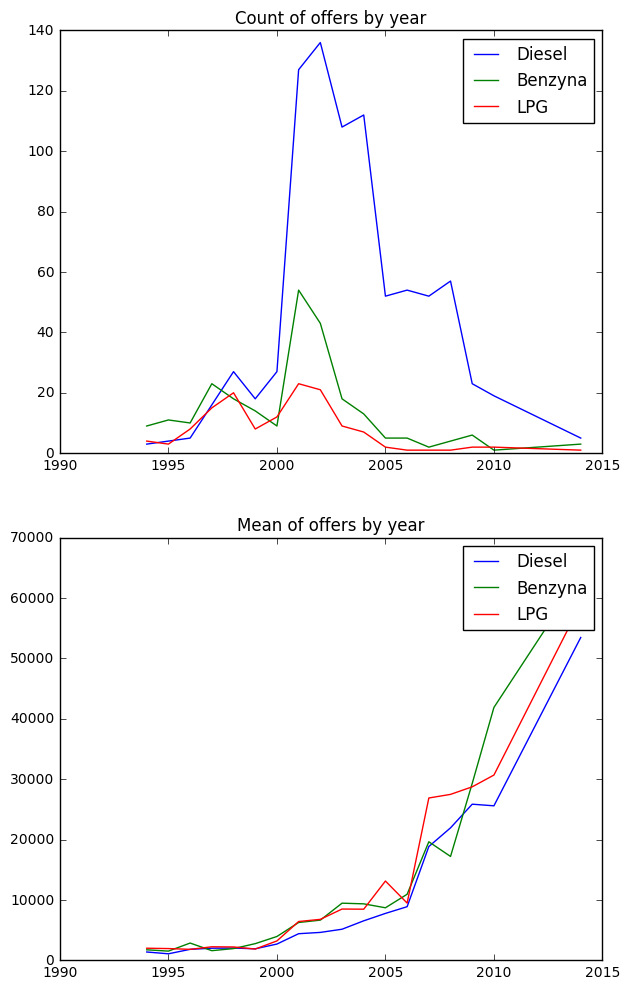

In [10]:
_ = by_year_stats([
    (lambda ofr: ofr['details']['Paliwo'] == 'Diesel'), 
    (lambda ofr: ofr['details']['Paliwo'] == 'Benzyna'), 
    (lambda ofr: ofr['details']['Paliwo'] == 'LPG')
    ], ['Diesel', 'Benzyna', 'LPG'], min_count=1)

Rok | Ilość | Manual | Ilość | Automat
1992 1 1500.0 0 0.0
1993 11 2492.63636364 0 0.0
1994 14 1760.64285714 2 1750.0
1995 18 1516.61111111 0 0.0
1996 21 1750.47619048 2 7975.0
1997 51 1929.68627451 3 1716.66666667
1998 64 2056.15625 1 3800.0
1999 37 2203.45945946 3 2400.0
2000 47 3119.0212766 1 1200.0
2001 199 5117.80904523 5 6299.6
2002 188 5337.77659574 12 4820.0
2003 128 5899.5703125 7 7199.85714286
2004 113 6790.53982301 19 7834.42105263
2005 51 8017.60784314 8 8249.75
2006 57 9038.22807018 3 9933.33333333
2007 55 19037.0545455 0 0.0
2008 57 21285.0 5 26940.0
2009 28 26485.7142857 3 28966.6666667
2010 20 25820.0 2 36700.0
2011 11 31154.0909091 5 33280.0
2012 6 24633.3333333 0 0.0
2013 5 43620.0 3 37499.6666667
2014 4 51972.5 5 61980.0
2015 1 97000.0 4 46925.0
2016 0 0.0 1 65000.0


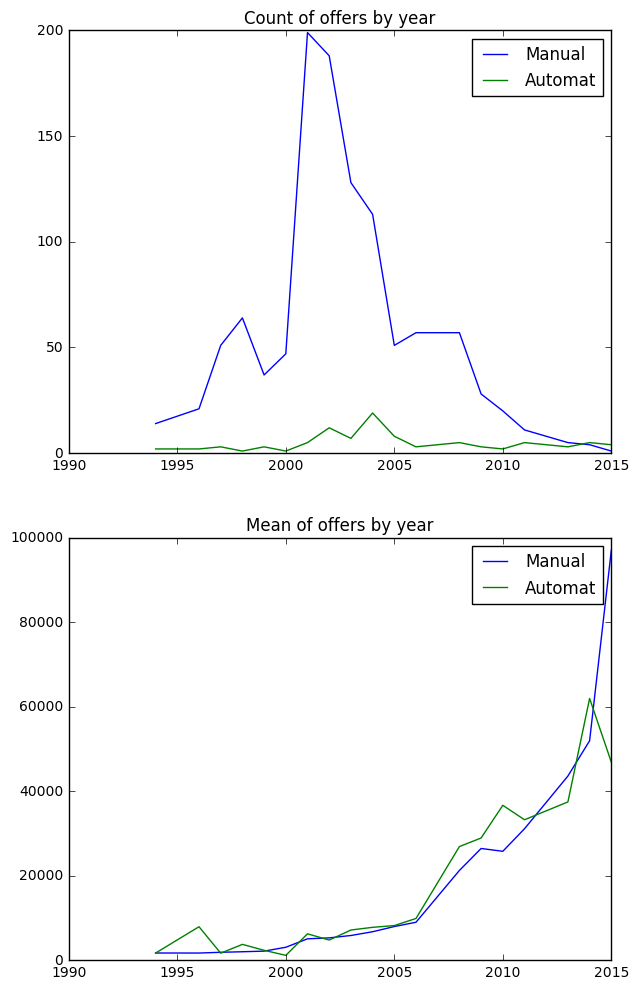

In [11]:
_ = by_year_stats([
    (lambda ofr: ofr['details'][u'Skrzynia biegów'] == 'Manualna'), 
    (lambda ofr: ofr['details'][u'Skrzynia biegów'] == 'Automatyczna')
    ], ['Manual', 'Automat'], min_count=1)

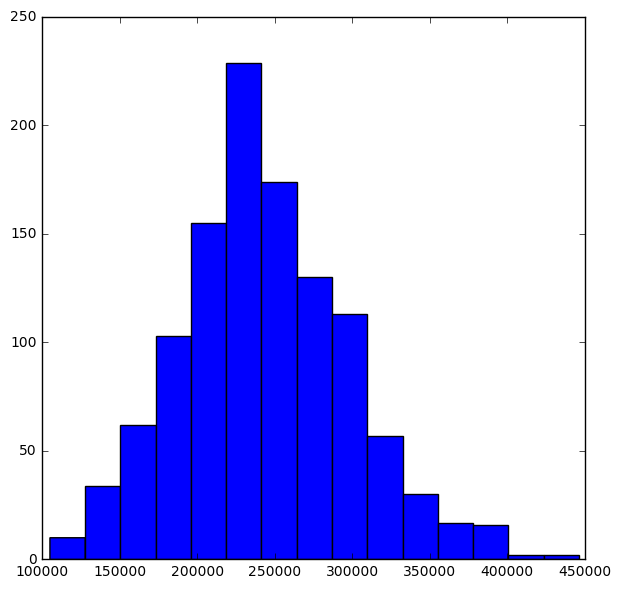

In [13]:
przebiegi = []
for ofr in offrs_dtls:
    if 'Przebieg' not in ofr['details']:
        continue
    przebieg = int(ofr['details']['Przebieg'][:-2].replace(' ',''))
    if przebieg > 100000 and przebieg < 1000000:
        przebiegi += [przebieg]
_ = hist(przebiegi, bins=15)

In [14]:
find_by_type(['details', 'Paliwo'])

N/A: 1
LPG: 144
Benzyna: 266
Diesel: 871


In [15]:
find_by_type(['details', u'Skrzynia biegów'])

N/A: 1
Automatyczna: 94
Manualna: 1187


In [16]:
find_by_type(['details', u'Typ nadwozia'])

N/A: 1
Minivan: 1
Sedan: 183
Hatchback: 329
Kombi: 768


In [17]:
find_by_type(['details', u'Poj. silnika'])

1 cm3: 1
1 754 cm3: 1
1 785 cm3: 1
1 793 cm3: 1
19 cm3: 1
90 cm3: 1
1 595 cm3: 1
2 179 cm3: 1
1 986 cm3: 1
1 799 cm3: 1
1 750 cm3: 1
2 488 cm3: 1
2 006 cm3: 1
2 999 cm3: 1
1 560 cm3: 1
2 506 cm3: 1
1 757 cm3: 1
2 198 cm3: 1
1 200 cm3: 1
2 967 cm3: 2
1 500 cm3: 2
1 300 cm3: 2
1 598 cm3: 2
1 789 cm3: 2
22 cm3: 2
1 597 cm3: 2
200 cm3: 2
2 544 cm3: 2
1 990 cm3: 3
1 980 cm3: 3
2 495 cm3: 3
1 989 cm3: 3
1 900 cm3: 3
1 996 cm3: 4
3 000 cm3: 5
18 cm3: 6
1 988 cm3: 7
2 200 cm3: 10
2 cm3: 10
20 cm3: 14
1 796 cm3: 16
2 500 cm3: 20
1 999 cm3: 22
N/A: 24
1 753 cm3: 24
1 997 cm3: 31
1 798 cm3: 31
1 600 cm3: 38
1 998 cm3: 198
1 800 cm3: 271
2 000 cm3: 499


In [18]:
find_by_type(['details', u'Oferta od'])

Firmy: 85
Osoby prywatnej: 1197


In [19]:
find_by_type(['details', u'Kolor'])

N/A: 1
Brązowy – Beżowy: 11
Czerwony: 27
Biały: 38
Żółty – Złoty: 41
Zielony: 86
Szary: 94
Inny kolor: 195
Niebieski: 196
Czarny: 199
Srebrny: 394


In [20]:
find_by_type(['details', u'Stan techniczny'])

N/A: 1
Uszkodzony: 119
Nieuszkodzony: 1162
